<a href="https://colab.research.google.com/github/Lejla1502/Data-Science-Bootcamp/blob/master/Linear_reagression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SIMPLE LINEAR REGRESSION

In [1]:
import numpy as np # to perform calculations 
import pandas as pd # to read data
import matplotlib.pyplot as plt # to visualise

#Loading the salary dataset
data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Linear_Regression_Introduction/master/Salary_Data.csv')

data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


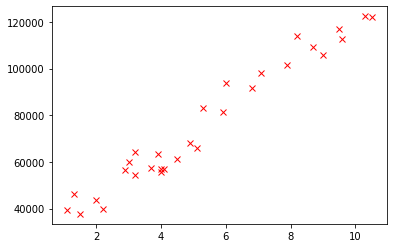

In [2]:
# Scatter plot helps in visualising the data distribution
plt.plot(data.YearsExperience, data.Salary,'rx')

#as the years of experience increase,so does the salary

In [3]:
#it is convention to name features with upper case (in our case 'X')

X=data[['YearsExperience']]
y=data['Salary']

In [4]:
#SPLITTING THE DATA

# import SK Learn train test split
from sklearn.model_selection import train_test_split 

# Assign variables to capture train test split output
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

In [5]:
#TRAINING OUR ALGORITHM

from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()  # create object for the class

#fit model to our training data i.e learn coefficients
linear_regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
# prints y-intercept  (b0)  when x is equal to 0
print(linear_regressor.intercept_)

# prints the coefficient  (b1)
print(linear_regressor.coef_)


#if experience is zero (no experience), then salary would be 25789-->intercept
#if experince goes up by 1, salary goes up by 9479

25789.060767971707
[9479.09167874]


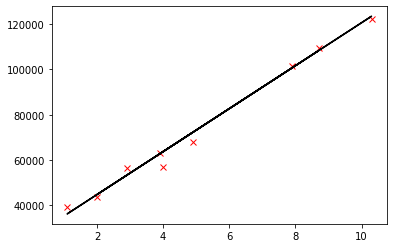

In [7]:
#MAKING PREDICTIONS BASED ON MODEL

y_pred = linear_regressor.predict(X_test)  # make predictions

plt.plot(X_test, y_test,'rx')
plt.plot(X_test, y_pred, color='black')
plt.show()

In [8]:
#MODEL EVALUATION

#There are three primary metrics used to evaluate linear models. 
#These are: 
#  Mean absolute error (MAE), 
#  Mean squared error (MSE), or 
#  Root mean squared error (RMSE).


# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test, y_pred))

#print result of MSE
print(metrics.mean_squared_error(y_test, y_pred))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


2450.548521354498
9961725.24601648
3156.2200883361224


#MULTIPLE LINEAR REGRESSION

In [9]:
#GOAL: predicting house price based on features

#To visualize
import seaborn as sns

# libraries for machine learning
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

# to plot the diagrams within the cells
%matplotlib inline

# Load the kc housing dataset
df = pd.read_csv("https://raw.githubusercontent.com/tanlitung/Datasets/master/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [12]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)



KeyError: ignored

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [14]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396058,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [15]:
#Normalizing data for comparison
#(it can be skipped) - not obligatory


from sklearn import preprocessing

# Scale and plot the features against price (target) using the MinMax scaler (Normalization)
min_max_scaler = preprocessing.MinMaxScaler()
col_name = df.drop('price', axis = 1).columns[:]
x = df.loc[:, col_name]
y = df['price']

# Normalizing x
x = pd.DataFrame(data = min_max_scaler.fit_transform(x), columns = col_name)

# Examine the normalized data
print(df.head())
x.head()

      price  bedrooms  bathrooms  ...     long  sqft_living15  sqft_lot15
0  221900.0         3       1.00  ... -122.257           1340        5650
1  538000.0         3       2.25  ... -122.319           1690        7639
2  180000.0         2       1.00  ... -122.233           2720        8062
3  604000.0         4       3.00  ... -122.393           1360        5000
4  510000.0         3       2.00  ... -122.045           1800        7503

[5 rows x 19 columns]


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0.090909,0.12500,0.067170,0.003108,0.0,0.0,0.0,0.5,0.500000,0.097588,0.000000,0.478261,0.000000,0.893939,0.571498,0.217608,0.161934,0.005742
1,0.090909,0.28125,0.172075,0.004072,0.4,0.0,0.0,0.5,0.500000,0.206140,0.082988,0.443478,0.988089,0.626263,0.908959,0.166113,0.222165,0.008027
2,0.060606,0.12500,0.036226,0.005743,0.0,0.0,0.0,0.5,0.416667,0.052632,0.000000,0.286957,0.000000,0.136364,0.936143,0.237542,0.399415,0.008513
3,0.121212,0.37500,0.126038,0.002714,0.0,0.0,0.0,1.0,0.500000,0.083333,0.188797,0.565217,0.000000,0.681818,0.586939,0.104651,0.165376,0.004996
4,0.090909,0.25000,0.104906,0.004579,0.0,0.0,0.0,0.5,0.583333,0.152412,0.000000,0.756522,0.000000,0.368687,0.741354,0.393688,0.241094,0.007871


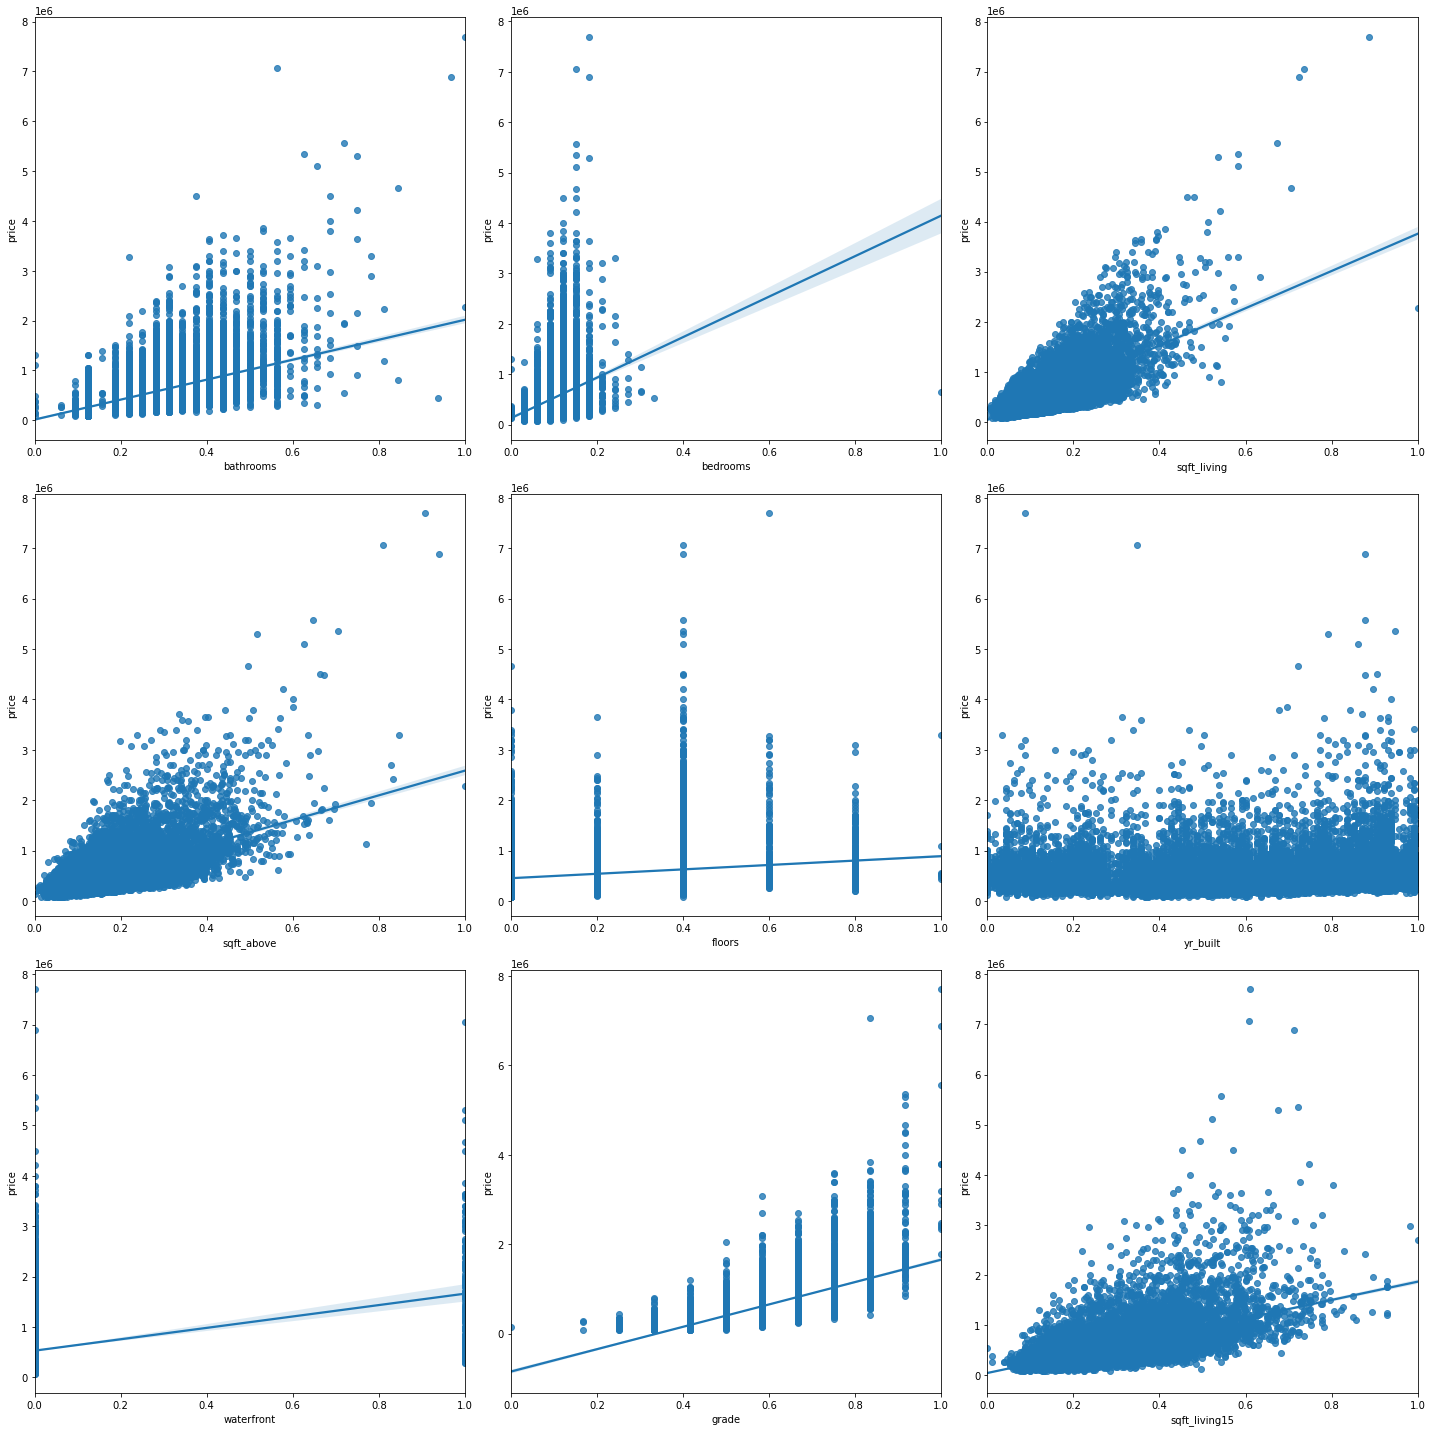

In [16]:
fig, axs = plt.subplots(ncols = 3, nrows = 3, figsize = (20, 20))
sns.regplot(y = df['price'], x = x['bathrooms'], ax = axs[0, 0])
sns.regplot(y = df['price'], x = x['bedrooms'], ax = axs[0, 1])
sns.regplot(y = df['price'], x = x['sqft_living'], ax = axs[0, 2])
sns.regplot(y = df['price'], x = x['sqft_above'], ax = axs[1, 0])
sns.regplot(y = df['price'], x = x['floors'], ax = axs[1, 1])
sns.regplot(y = df['price'], x = x['yr_built'], ax = axs[1, 2])
sns.regplot(y = df['price'], x = x['waterfront'], ax = axs[2, 0])
sns.regplot(y = df['price'], x = x['grade'], ax = axs[2, 1])
sns.regplot(y = df['price'], x = x['sqft_living15'], ax = axs[2, 2])
plt.tight_layout()


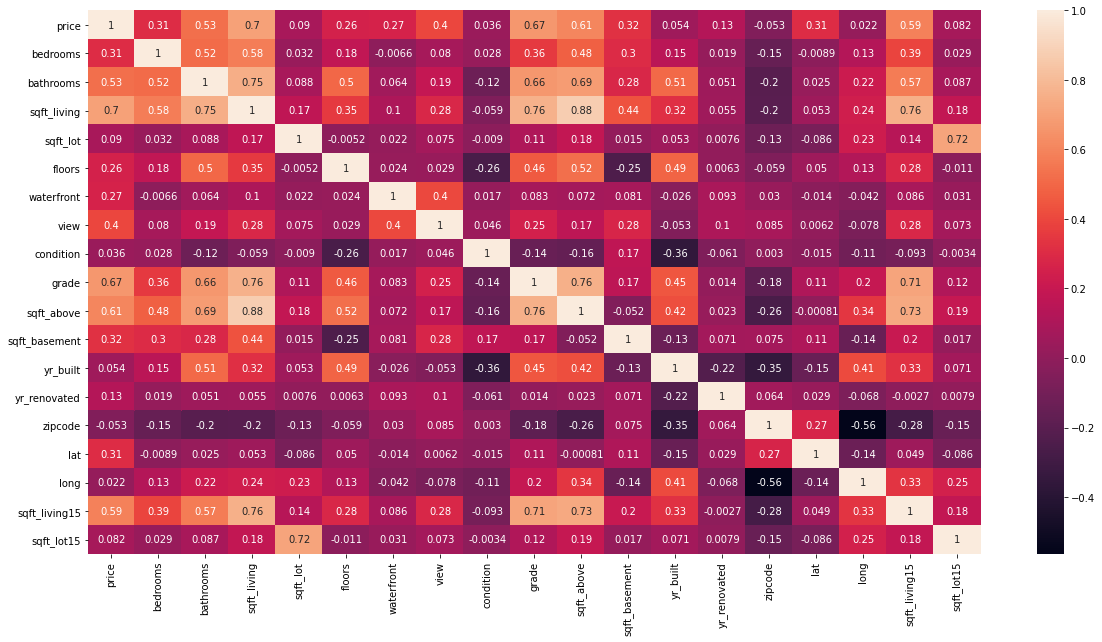

In [17]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [18]:
#Split the data
#features_dataset: the input dataset to the model
#target_dataset: the output dataset to the model
#test_size: the percent of data that you want to use for testing, usually from (0.2 - 0.4)
#random_state: randomly split the train and test dataset

features = df.drop('price', axis = 1)
target = df['price']
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size = 0.2, random_state = 5)
print("Train features shape : ", train_features.shape)
print("Train target shape   : ", train_target.shape)
print("Test features shape  : ", test_features.shape)
print("Test target shape    : ", test_target.shape)

Train features shape :  (17290, 18)
Train target shape   :  (17290,)
Test features shape  :  (4323, 18)
Test target shape    :  (4323,)


In [19]:
#Model building


model = LinearRegression(normalize = True)  #automaticcally normalizing data
model.fit(train_features, train_target)  #train the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
#Interpret the model

#in this case, intercept means if all the variables are 0, outcome will beintercept

print("Model intercept  : ", model.intercept_, "\n")
print("Model coefficient: ", model.coef_, "\n")

for i in range(len(features.columns)):
    print(features.columns[i], ": ", model.coef_[i])

Model intercept  :  4885194.015872726 

Model coefficient:  [-3.41051487e+04  3.99211786e+04 -2.58757456e+03  1.26478128e-01
  5.33987195e+03  5.80487816e+05  5.35040293e+04  2.73331959e+04
  9.63305323e+04  2.76922289e+03  2.73674117e+03 -2.63338492e+03
  2.52026883e+01 -5.54455479e+02  6.02529710e+05 -2.07308756e+05
  2.01439122e+01 -3.84507098e-01] 

bedrooms :  -34105.148726101404
bathrooms :  39921.178617104044
sqft_living :  -2587.57456041319
sqft_lot :  0.12647812775771375
floors :  5339.871948396503
waterfront :  580487.8156734108
view :  53504.029319236775
condition :  27333.195886130983
grade :  96330.53232096255
sqft_above :  2769.2228929816365
sqft_basement :  2736.741171576018
yr_built :  -2633.3849222372637
yr_renovated :  25.20268826661551
zipcode :  -554.4554793058576
lat :  602529.7099847157
long :  -207308.75551896513
sqft_living15 :  20.143912231160364
sqft_lot15 :  -0.3845070978801813


In [21]:
# Model evaluation for training set
train_target_pred = model.predict(train_features)
rmse = (np.sqrt(mean_squared_error(train_target, train_target_pred)))
r2 = r2_score(train_target, train_target_pred)

# Examine the first 10 predicted output from the model
output = pd.DataFrame(train_target[0:10])
output['Predicted'] = train_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model training performance:")
print("---------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# Model evaluation for testing set
test_target_pred = model.predict(test_features)
rmse = (np.sqrt(mean_squared_error(test_target, test_target_pred)))
r2 = r2_score(test_target, test_target_pred)

output = pd.DataFrame(test_target[0:10])
output['Predicted'] = test_target_pred[0:10]
output['Difference'] = output['Predicted'] - output['price']
print(output, "\n")

print("Model testing performance:")
print("--------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

           price     Predicted     Difference
3856    535000.0  6.568467e+05  121846.663826
5010    425000.0  2.880304e+05 -136969.567857
18050   800000.0  1.041330e+06  241330.384616
570     338900.0  1.797743e+05 -159125.738118
8556   1110000.0  1.122411e+06   12411.219660
19435   333000.0  4.801479e+05  147147.907190
16918   830000.0  8.114510e+05  -18548.967652
21010   525000.0  5.585742e+05   33574.160662
6156    375000.0  3.682123e+05   -6787.733889
10074   333760.0  3.485609e+05   14800.947067 

Model training performance:
---------------------------
RMSE is 201016.8057842998
R2 score is 0.6996317212121281


          price     Predicted     Difference
17485  365000.0  4.280495e+05   63049.478229
15164  225000.0  9.861129e+04 -126388.707462
18449  384950.0  4.832986e+05   98348.646509
6828   657500.0  5.908904e+05  -66609.583049
18281  959000.0  1.195190e+06  236189.880048
14625  855000.0  8.805543e+05   25554.290965
14864  575000.0  6.394081e+05   64408.126046
17257  856500.0  